In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df_salaries=pd.read_csv("Salaries.csv")

In [6]:
type(df_salaries)

pandas.core.frame.DataFrame

In [8]:
df_salaries.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [9]:
df_salaries.shape

(148648, 13)

In [10]:
df_salaries.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes
count,148648.000000,148043.000000,148648.000000,148648.000000,112490.000000,148648.000000,148648.000000,148648.000000,0.0
mean,74326.110220,66325.398119,5065.821161,3648.761721,25007.777439,74770.035453,93694.776345,2012.522617,NaN
std,42911.633315,42764.898947,11454.266982,8056.655841,15402.235424,50516.440633,62792.743250,1.117526,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN
25%,37163.750000,33587.350000,0.000000,0.000000,11535.192500,36169.370000,44072.062500,2012.000000,NaN
50%,74326.500000,65007.450000,0.000000,811.205000,28628.365000,71427.130000,92406.020000,2013.000000,NaN
75%,111488.250000,94691.050000,4657.597500,4236.035000,35566.790000,105840.920000,132876.997500,2014.000000,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN


In [11]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148648 entries, 0 to 148647
Data columns (total 13 columns):
Id                  148648 non-null int64
EmployeeName        148648 non-null object
JobTitle            148648 non-null object
BasePay             148043 non-null float64
OvertimePay         148648 non-null float64
OtherPay            148648 non-null float64
Benefits            112490 non-null float64
TotalPay            148648 non-null float64
TotalPayBenefits    148648 non-null float64
Year                148648 non-null int64
Notes               0 non-null float64
Agency              148648 non-null object
Status              38119 non-null object
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB


In [18]:
# checking missing values
df_salaries.isnull().any() # BasePay,Benefits,Notes, Status

Id                  False
EmployeeName        False
JobTitle            False
BasePay              True
OvertimePay         False
OtherPay            False
Benefits             True
TotalPay            False
TotalPayBenefits    False
Year                False
Notes                True
Agency              False
Status               True
dtype: bool

In [40]:
df_salaries.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [39]:
# missing value imputation of BasePay,Benefits,Notes & Status
df_salaries.BasePay.fillna(value=df_salaries.BasePay.mean(),inplace=True)
df_salaries.Benefits.fillna(value=df_salaries.Benefits.mean(),inplace=True)

df_salaries=df_salaries.drop(['Notes','Status'],axis=1)

In [42]:
df_salaries.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25007.777439,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25007.777439,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25007.777439,335279.91,335279.91,2011,San Francisco


In [58]:
#Bivariate analysis of totalbenefits and year

In [52]:
pay_year_sum=df_salaries.groupby('Year')['TotalPayBenefits'].sum()

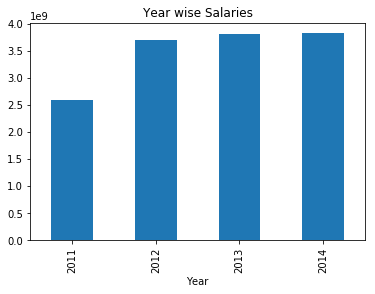

In [57]:
pay_year_sum.plot.bar(title="Year wise Salaries")

In [67]:
#Total salarycost for 2011
df_salaries[df_salaries['Year']==2011]['TotalPayBenefits'].sum()

2594113030.72

In [68]:
#Total salarycost for 2014
df_salaries[df_salaries['Year']==2014]['TotalPayBenefits'].sum()

3821865780.6

In [69]:
#Total salary cost increase from 2011 to 2014
df_salaries[df_salaries['Year']==2014]['TotalPayBenefits'].sum() - df_salaries[df_salaries['Year']==2011]['TotalPayBenefits'].sum()

1227752749.88

In [71]:
df_salaries.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [80]:
# Top earning employee across years
from pandasql import sqldf
q1="select employeename,totalpaybenefits from df_salaries order by totalpaybenefits DESC LIMIT 3;"
pysqldf=lambda q:sqldf(q,globals())
print(pysqldf(q1))

     EmployeeName  TotalPayBenefits
0  NATHANIEL FORD         567595.43
1    GARY JIMENEZ         538909.28
2     David Shinn         510732.68


In [96]:
df_salaries[df_salaries.TotalPayBenefits==sorted(df_salaries['TotalPayBenefits'],reverse=True)[0]]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,25007.777439,567595.43,567595.43,2011,San Francisco


In [88]:
? sorted

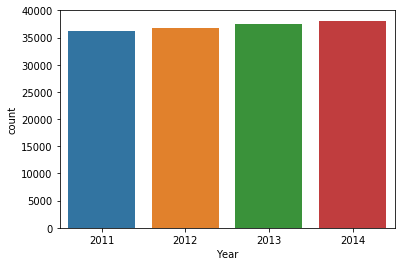

In [97]:
sns.countplot(df_salaries.Year) # employee count increases over the year

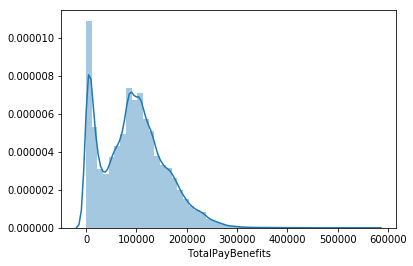

In [98]:
sns.distplot(df_salaries.TotalPayBenefits)  # Salary is  positively skewed, with some data on the higher side

In [101]:
cr=df_salaries[['BasePay', 'OvertimePay', 'OtherPay','Benefits', 'TotalPay', 'TotalPayBenefits']].corr()

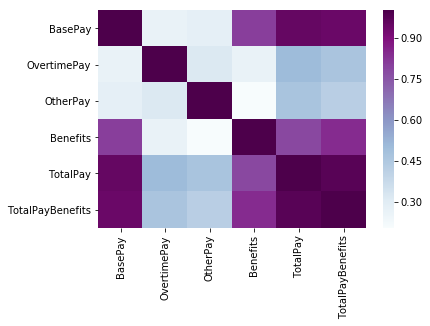

In [102]:
sns.heatmap(cr, cmap='BuPu')  # Basepay and benefits contribute more to total salary